# Logistic Regression

Logistic Regression is the classification old school (tried and true). Its fast, interpretable, does not require feature scaling,  no hyperparameters to tune, easy to regularize, outputs predicted probablilities.

P(x) = $\frac{1}{1 + e^{b_0 + b_1x}}$


Simple linear function put into the logit function to get the distribution you want. Models binary outcomes



## Threshold Functions for Logistic Regressions

#### The Logit Function

logit function is the log of the Odds Ratio. Plot a set of events on the x axis and the logit value for that event on the y axis.

$logit(p) = log(\frac{p}{1-p})$


Now fit a linear regression to the model.

$logit(p) = log( \frac{p}{1-p} ) = b_0 + b_1X$





We want to express log odds as a linear function of score.

$p(X) = \frac{1}{1 + e^{b_0 + b_1X}}$

## Probablility Ratio
takes the domain [0,1] and maps it to the positive real axis.

$\frac{p}{1-p}$

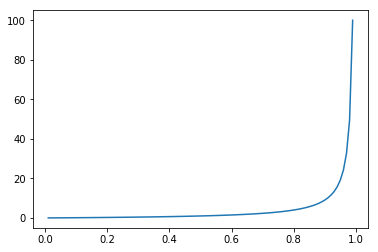

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0.01, 1, 100, endpoint = False)

def y(p):
    return p/(1-p)

y = np.vectorize(y)
plt.plot(x,y(x))
plt.show()

## Logit Function
takes the positive real axis and maps it to (0,1)

$logit(p) = log( \frac{p}{1-p} ) $

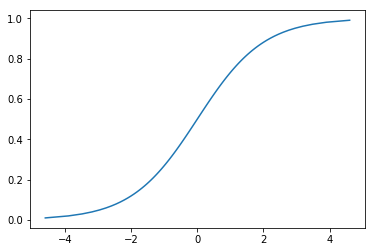

In [3]:
logit = np.log(y(x))
plt.plot(logit, x)
plt.show()

## Logistic Function

The logistic function is the inverse of the logit function and lets us predict conditional probablility that a certain sample belongs to class 1.


$p(X) = \frac{1}{1 + e^{b_0 + b_1X}}$

# Logistic Regression Geometric Intuition

https://florianhartl.com/logistic-regression-geometric-intuition.html

How does logistic regression compare to SVM in its geometric intuition.

https://florianhartl.com/wp-content/ql-cache/quicklatex.com-9f9a1ad357b6ac489bbf2a8a4e37008f_l3.png

" the algorithm essentially adds a new dimension for our dependent variable and fits a logistic function g(z) to the arising two-dimensional data in such a way that it separates the samples as good as possible within the range of 0<=g(z)<=1. "



# Logistic Regression In Practice

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

## LogisticRegressionCV

Class object that implements logistic regression using many solver methods, and searches through a grid of Cs values using Kfold



sklearn.linear_model.LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, penalty=’l2’, scoring=None, solver=’lbfgs’, tol=0.0001, max_iter=100, class_weight=None, n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0, multi_class=’ovr’, random_state=None


Cs : list of floats | int

Each of the values in Cs describes the inverse of regularization strength. If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4. Like in support vector machines, smaller values specify stronger regularization.



cv : integer or cross-validation generator

The default cross-validation generator used is Stratified K-Folds. If an integer is provided, then it is the number of folds used. See the module sklearn.model_selection module for the list of possible cross-validation objects.

solver: 'liblinear' for small data sets 'saga' for large


### Attributes:  
    .coef_  intercept_
    
    
## LogisticRegression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’liblinear’, max_iter=100, multi_class=’ovr’, verbose=0, warm_start=False, n_jobs=1)[source]¶


C : float, default: 1.0

Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’},

default: ‘liblinear’ Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and
‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’
handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas
‘liblinear’ and ‘saga’ handle L1 penalty.

# Logistic Regression Over and Underfitting

http://www.bogotobogo.com/python/scikit-learn/scikit-learn_logistic_regression.php

A linear model that regresses for the probability of a categorical outcome.

When considering this model and a standard linear regression we think of the input signal as the linear combination input.

## $s = \sum_{i=0}^n w_i x_i = \mathbf w^T \mathbf x$

Linear regression does nothing to the signal. while logistic regression funnels the signal through the logistic function which is a continuous mapping to (0,1)

Output of the logistic function is considered the probability.

Sigmoid function.

## $\theta (s) = \frac {e^s}{1+e^s}$


Likelihood of the given data (x,y)


## $P(y|\mathbf x) = \theta(y\mathbf w^T \mathbf x)$

for a whole data set

## $\prod_{n=1}^N \theta(y_n \color{purple}{\mathbf w}^T \mathbf x_n)$

Now we have conditional probablilities for the entire data set by funneling a linear model through the sigmoid function. unfortunately, the function mapping may be entirely imprecise in the context of our sample data. We seek to minimize in sample errors by minimizing the weights w


Effectively minimizing the in sample error equation

## $E_{in}(\color{purple}{\mathbf w}) = \frac {1}{N} \sum_{n=1}^N  \underbrace{  \ln \left( 1 + e^{-y_n \color{purple}{\mathbf w}^T \mathbf x_n}  \right)  }_{\text{ "cross-entropy" error}}$

Where as in standard OLS we minimize the following function which is geometrically the sum of squared errors. (Squared distance between regression line and sample outcome.

## $E_{in}(\color{purple}{\mathbf w}) = \frac {1}{N} \sum_{n=1}^N  \left( \color{purple}{\mathbf w}^T \mathbf x_n - y_n \right)^2$


Both of these are continuous and differentiable functions that can be optimized with gradient descent.

## Avoiding Overfitting in Logistic Regression

Cross Validation, Regularization, early stopping, or pruning.

Regularization- reduce the complexity of the model by adding some term to penalize high weights. Very useful tool to handle collinearity (Seeks to reduce the magnitude of all weights and therefore prefers models without redundant terms). Filters out alot of the noise in data.

The hyperparameter C is the inverse of the regularization parameter. ie a higher C means less regularization. Remember that more regularization means a higher weight-magnitude penalty and therefore shrinks weights.


This parameter can be quickly tuned with the above scikit learn class LogisticRegressionCV




# Further Reading
http://www.bogotobogo.com/python/scikit-learn/logistic_regression.php

http://blog.yhat.com/posts/logistic-regression-and-python.html


## Logistic Regression Coefficient

For $w_{i}$ a weight in the logistic function. the weight value shows the conversion rate between units of column i and unit increase in the log odds of the positive outcome.

## The Cost Function
### Maximum Likelihood Estimation

http://suriyadeepan.github.io/2017-01-22-mle-linear-regression/

Assume each data point  is independent and drawn from a gaussian probablility curve of unknown mean and variance 1

The Likelihood of data points y1, y2, y3 having been drawn from a gaussian curve is:

$P(y1,y2,y3 \vert \theta) = P(y1 \vert \theta) P(y2 \vert \theta) P(y3 \vert \theta)$

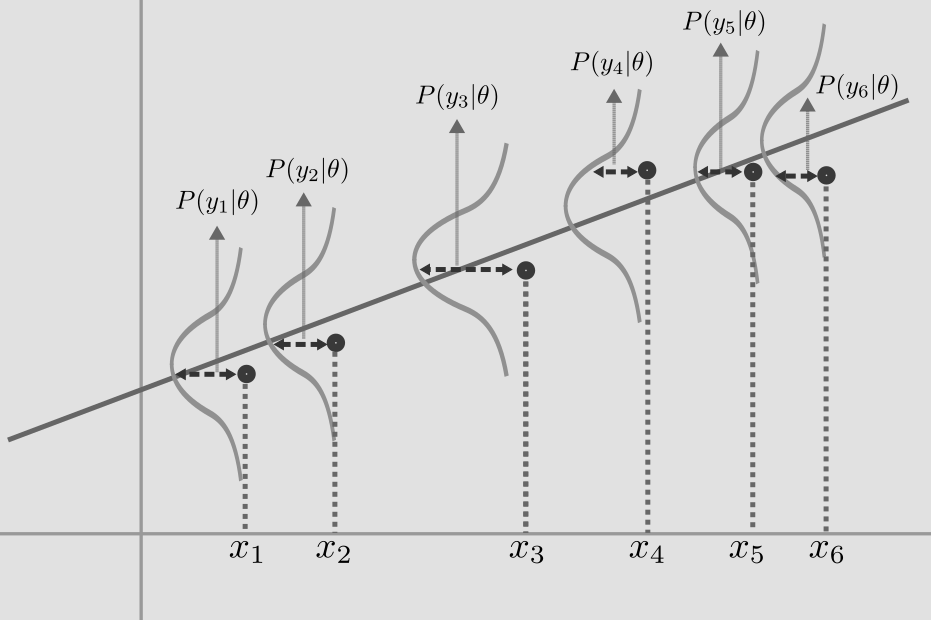

